11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                         

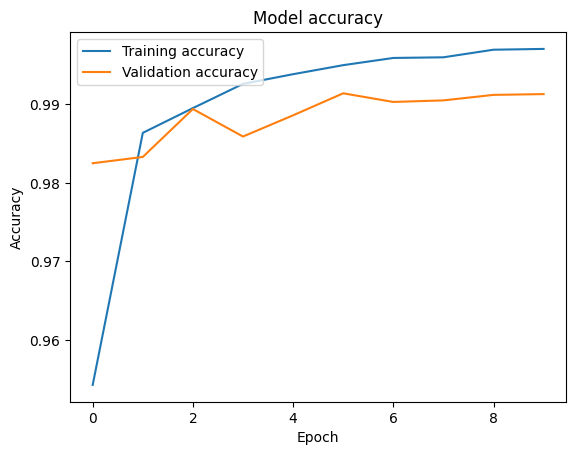

In [ ]:
#Simple CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Make sure images have shape (28, 28, 1)
train_images = train_images[..., tf.newaxis].astype("float32")
test_images = test_images[..., tf.newaxis].astype("float32")

# Build the CNN model
model = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  # Add more layers as needed
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10)
])

# Model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 se_block (SEBlock)          (None, 13, 13, 32)        162       
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                        

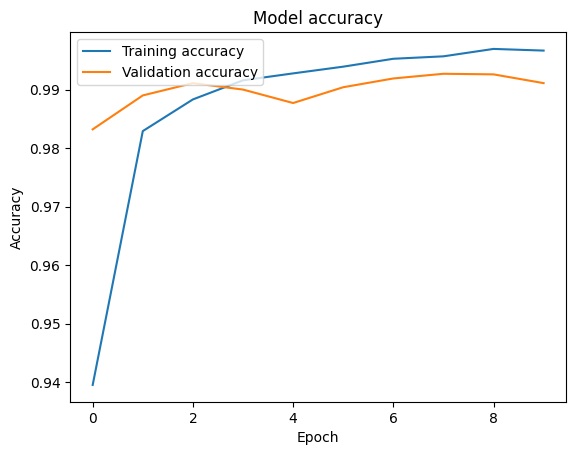

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Input
import matplotlib.pyplot as plt

class SEBlock(layers.Layer):
    def __init__(self, input_channels, reduction_ratio=16):
        super(SEBlock, self).__init__()
        self.pool = layers.GlobalAveragePooling2D()
        self.fc1 = layers.Dense(input_channels // reduction_ratio, activation='relu')
        self.fc2 = layers.Dense(input_channels, activation='sigmoid')

    def call(self, input_features):
        # Squeeze
        z = self.pool(input_features)
        z = tf.keras.layers.Reshape((1, 1, z.shape[1]))(z)
        # Excitation
        z = self.fc1(z)
        z = self.fc2(z)
        # Scale
        return input_features * z

def make_model(input_shape):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = SEBlock(32)(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = SEBlock(64)(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = SEBlock(64)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Make sure images have shape (28, 28, 1)
train_images = train_images[..., tf.newaxis].astype("float32")
test_images = test_images[..., tf.newaxis].astype("float32")

# Build the model
model = make_model((28, 28, 1))

# Model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers

def residual_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    # Shortcut path
    shortcut = x

    # First convolutional layer
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)

    # Second convolutional layer
    x = layers.Conv2D(filters, kernel_size, padding='same', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)

    # Shortcut connection
    if strides != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same', kernel_regularizer=regularizers.l2(0.0001))(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation(activation)(x)
    return x

def ResNet18(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # Initial convolutional layer
    x = layers.Conv2D(64, 7, strides=2, padding='same', kernel_regularizer=regularizers.l2(0.0001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.AveragePooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, strides=2)
    x = residual_block(x, 128)
    x = residual_block(x, 256, strides=2)
    x = residual_block(x, 256)
    x = residual_block(x, 512, strides=2)
    x = residual_block(x, 512)

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Final fully connected layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs)

    return model

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train[..., tf.newaxis] / 255.0, x_test[..., tf.newaxis] / 255.0

# Build and compile ResNet-18 model
resnet18 = ResNet18(input_shape=(28, 28, 1), num_classes=10)
resnet18.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
resnet18.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = resnet18.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/5
938/938 [==============================] - 38s 29ms/step - loss: 0.4283 - accuracy: 0.9520 - val_loss: 0.3814 - val_accuracy: 0.9541
Epoch 2/5
938/938 [==============================] - 24s 26ms/step - loss: 0.2723 - accuracy: 0.9796 - val_loss: 0.2491 - val_accuracy: 0.9783
Epoch 3/5
938/938 [==============================] - 23s 25ms/step - loss: 0.2088 - accuracy: 0.9825 - val_loss: 0.2398 - val_accuracy: 0.9690
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.1657 - accuracy: 0.9846 - val_loss: 0.2135 - val_accuracy: 0.9654
Epoch 5/5
938/938 [==============================] - 24s 26ms/step - loss: 0.1481 - accuracy: 0.9841 - val_loss: 0.1682 - val_accuracy: 0.9781
313/313 - 2s - loss: 0.1682 - accuracy: 0.9781 - 2s/epoch - 6ms/step

Test accuracy: 0.9781000018119812


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers

def squeeze_excite_block(tensor, ratio=16):
    channels = tensor.shape[-1]
    se = layers.GlobalAveragePooling2D()(tensor)
    se = layers.Reshape((1, 1, channels))(se)
    se = layers.Conv2D(channels // ratio, 1, activation='relu', padding='same')(se)
    se = layers.Conv2D(channels, 1, activation='sigmoid', padding='same')(se)
    return layers.Multiply()([tensor, se])

def residual_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    # Shortcut path
    shortcut = x

    # First convolutional layer
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)

    # Second convolutional layer
    x = layers.Conv2D(filters, kernel_size, padding='same', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)

    # Squeeze and Excitation
    x = squeeze_excite_block(x)

    # Shortcut connection
    if strides != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same', kernel_regularizer=regularizers.l2(0.0001))(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation(activation)(x)
    return x

def ResNet18(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # Initial convolutional layer
    x = layers.Conv2D(64, 7, strides=2, padding='same', kernel_regularizer=regularizers.l2(0.0001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.AveragePooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, strides=2)
    x = residual_block(x, 128)
    x = residual_block(x, 256, strides=2)
    x = residual_block(x, 256)
    x = residual_block(x, 512, strides=2)
    x = residual_block(x, 512)

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Final fully connected layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs)

    return model

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train[..., tf.newaxis] / 255.0, x_test[..., tf.newaxis] / 255.0

# Build and compile ResNet-18 model with Squeeze and Excitation
resnet18 = ResNet18(input_shape=(28, 28, 1), num_classes=10)
resnet18.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
resnet18.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = resnet18.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/5
938/938 [==============================] - 46s 32ms/step - loss: 0.3892 - accuracy: 0.9561 - val_loss: 0.4662 - val_accuracy: 0.9295
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.2337 - accuracy: 0.9798 - val_loss: 0.2898 - val_accuracy: 0.9488
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.1724 - accuracy: 0.9829 - val_loss: 0.1724 - val_accuracy: 0.9776
Epoch 4/5
938/938 [==============================] - 28s 30ms/step - loss: 0.1407 - accuracy: 0.9844 - val_loss: 0.1171 - val_accuracy: 0.9881
Epoch 5/5
938/938 [==============================] - 28s 30ms/step - loss: 0.1243 - accuracy: 0.9857 - val_loss: 0.1172 - val_accuracy: 0.9866
313/313 - 2s - loss: 0.1172 - accuracy: 0.9866 - 2s/epoch - 6ms/step

Test accuracy: 0.9865999817848206


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNet
import cv2
from tqdm import tqdm
import numpy as np
from skimage.transform import resize

# Define function to resize and preprocess images
def resize_images(images, img_size):
    resized_images = []
    for i in tqdm(range(len(images))):
        img = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
        resized_images.append(resize(img, (img_size, img_size), mode='constant'))
    return np.array(resized_images, dtype='float32')

# Load MNIST dataset and select a subset of images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
no_of_images = 2000
x_train = x_train[:no_of_images]
y_train = y_train[:no_of_images]
x_test = x_test[:int(no_of_images/2)]
y_test = y_test[:int(no_of_images/2)]

# Resize and preprocess images
img_size = 224  # Size compatible with MobileNet
x_train_resized = resize_images(x_train, img_size)
x_test_resized = resize_images(x_test, img_size)

# Load MobileNet model without top (classification) layer
base_model = MobileNet(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3), pooling='avg')

# Replace all max pooling layers with average pooling
for layer in base_model.layers:
    if 'MaxPooling' in layer.__class__.__name__:
        layer.__class__ = layers.AveragePooling2D

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add classification layer
outputs = layers.Dense(10, activation='softmax')(base_model.output)

# Create new model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_resized, y_train, epochs=5, batch_size=64, validation_data=(x_test_resized, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_resized, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


100%|██████████| 1000/1000 [00:13<00:00, 76.88it/s]


Epoch 1/5
32/32 [==============================] - 6s 141ms/step - loss: 1.7556 - accuracy: 0.4725 - val_loss: 1.0545 - val_accuracy: 0.7750
Epoch 2/5
32/32 [==============================] - 3s 109ms/step - loss: 0.7176 - accuracy: 0.8865 - val_loss: 0.6232 - val_accuracy: 0.8580
Epoch 3/5
32/32 [==============================] - 3s 104ms/step - loss: 0.4415 - accuracy: 0.9365 - val_loss: 0.4757 - val_accuracy: 0.8920
Epoch 4/5
32/32 [==============================] - 3s 109ms/step - loss: 0.3341 - accuracy: 0.9445 - val_loss: 0.3960 - val_accuracy: 0.9110
Epoch 5/5
32/32 [==============================] - 3s 102ms/step - loss: 0.2737 - accuracy: 0.9515 - val_loss: 0.3485 - val_accuracy: 0.9210
32/32 - 1s - loss: 0.3485 - accuracy: 0.9210 - 1s/epoch - 37ms/step

Test accuracy: 0.9210000038146973


In [2]:
# Define MobileNet without Squeeze-and-Excitation
def MobileNet_no_SE(input_shape=(28, 28, 1), num_classes=10):
    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D((3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Add more layers as needed...

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=x)
    return model

# Create and compile the model
model_no_se = MobileNet_no_SE(input_shape=(28, 28, 1), num_classes=10)
model_no_se.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_no_se.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on test data
loss_no_se, accuracy_no_se = model_no_se.evaluate(x_test, y_test)
print("Test Loss (without attention):", loss_no_se)
print("Test Accuracy (without attention):", accuracy_no_se)


Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 1.6906 - accuracy: 0.4417 - val_loss: 2.0564 - val_accuracy: 0.2812
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 1.2249 - accuracy: 0.6120 - val_loss: 1.3572 - val_accuracy: 0.5032
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 1.0464 - accuracy: 0.6738 - val_loss: 1.1474 - val_accuracy: 0.5854
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.9502 - accuracy: 0.7043 - val_loss: 1.6352 - val_accuracy: 0.4342
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.8851 - accuracy: 0.7266 - val_loss: 1.5792 - val_accuracy: 0.4336
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.8325 - accuracy: 0.7461 - val_loss: 1.2638 - val_accuracy: 0.5686
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.7951 - accuracy: 0.7579 - val_loss: 0.9253 -

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Squeeze-and-Excitation block
def squeeze_excite_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Dense(filters // ratio, activation='relu')(se)
    se = layers.Dense(filters, activation='sigmoid')(se)
    se = layers.Reshape((1, 1, filters))(se)
    return layers.multiply([input_tensor, se])

# Define MobileNet with Squeeze-and-Excitation
def MobileNet_SE(input_shape=(28, 28, 1), num_classes=10):
    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D((3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = squeeze_excite_block(x)  # Add SE block

    # Add more layers as needed...

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=x)
    return model

# Compile the model
model = MobileNet_SE(input_shape=(28, 28, 1), num_classes=10)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape input data for MobileNet
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
1875/1875 [==============================] - 34s 17ms/step - loss: 1.6539 - accuracy: 0.4432 - val_loss: 2.0869 - val_accuracy: 0.2376
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 1.1886 - accuracy: 0.6139 - val_loss: 1.5894 - val_accuracy: 0.4187
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 1.0315 - accuracy: 0.6744 - val_loss: 1.3919 - val_accuracy: 0.5184
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.9302 - accuracy: 0.7113 - val_loss: 11.8687 - val_accuracy: 0.1019
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.8631 - accuracy: 0.7345 - val_loss: 3.5319 - val_accuracy: 0.3211
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.8111 - accuracy: 0.7511 - val_loss: 0.8928 - val_accuracy: 0.6864
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.7653 - accuracy: 0.7686 - val_loss: 1.8282 